In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-02-21 14:57:31 +05:30)


In [2]:
!pip install bing-image-downloader

time: 2.48 s (started: 2021-02-21 14:33:25 +05:30)


In [3]:
!mkdir images

time: 16 ms (started: 2021-02-21 14:33:27 +05:30)


A subdirectory or file images already exists.


In [8]:
from bing_image_downloader import downloader 
downloader.download("sunflower",limit=30,output_dir ='images',adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.almanac.com/sites/default/files/image_nodes/sunflower-1627193_1920.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/a/a9/A_sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.agriorbit.com/wp-content/uploads/2019/05/sunflower-3550693_1920-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.agricol.co.za/wp-content

In [9]:
from bing_image_downloader import downloader 
downloader.download("rose",limit=30,output_dir ='images',adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.theperfectrose.com/FS/STORE/104/2/Pink_Promise.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gardeningknowhow.com/wp-content/uploads/2015/03/osiria-rose.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://enablelc.org/wp-content/uploads/2017/01/BS-Yellow-rose.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cowellsgc.co.uk/files/images/webshop/rose-my-lovely-mum-keep-smiling-1546548287_l.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.lewisginter.org/wp-content/uploads/2014/11/Hybrid-Tea-Rose-Rosa-Olympiad-McGredy-Rosacae.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://susanrushtondotnet.files.wordpress.com/2015/03/orange-rose.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.naturehills.com/media/catalog/product/cache/35c1080e597d6a74b42d0d88ced836c1/e/a/easy-elegance-paint-t

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 969 ms (started: 2021-02-21 14:57:45 +05:30)


In [3]:
target = []
images = []
flat_data= []

DATADIR = 'C:/Users/Asus/Desktop/New folder/jupyternotebook/images'
CATEGORIES = ['sunflower','rose']

for category in CATEGORIES:
    category_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150 ,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(category_num)
        
        
flat_data =np.array(flat_data)     
target = np.array(target)
images= np.array(images)

time: 58.5 s (started: 2021-02-21 14:57:46 +05:30)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 703 ms (started: 2021-02-21 14:58:44 +05:30)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 35.6 s (started: 2021-02-21 14:58:45 +05:30)


In [6]:
y_pred = clf.predict(X_test)
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

time: 63 ms (started: 2021-02-21 14:59:21 +05:30)


In [7]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

time: 0 ns (started: 2021-02-21 14:59:21 +05:30)


In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 0 ns (started: 2021-02-21 14:59:21 +05:30)


In [9]:
accuracy_score(y_pred,y_test)

0.8947368421052632

time: 0 ns (started: 2021-02-21 14:59:21 +05:30)


In [10]:
confusion_matrix(y_pred,y_test)

array([[9, 1],
       [1, 8]], dtype=int64)

time: 0 ns (started: 2021-02-21 14:59:21 +05:30)


In [11]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 32 ms (started: 2021-02-21 14:59:21 +05:30)


In [12]:
model = pickle.load(open('img_model.p','rb'))

time: 31 ms (started: 2021-02-21 14:59:21 +05:30)


enter your urlhttps://images-na.ssl-images-amazon.com/images/I/51ca-OUSBML._SY879_.jpg
(879, 495, 3)
 PREDICTED OUTPUT: rose


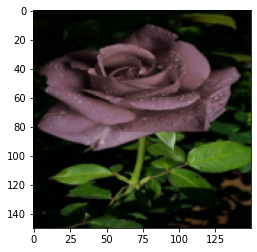

time: 1min 41s (started: 2021-02-21 14:59:21 +05:30)


In [13]:
#testing image
flat_data=[]
url = input('enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out =CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [14]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

time: 5.75 s (started: 2021-02-21 15:01:02 +05:30)


In [15]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
st.title('Image Classifier')
st.text('Upload Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image....", type ="jpg")
if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image (img,caption = 'Uploaded Image')
    
    if st.button('PREDICT'):
        CATEGORIES = ['sunflower','rose']
        st.write('Resultt...')
        flat_data =[]
        img = np.array(img)
        img_resized = resize(img,(150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        y_out = model.predict(flat_data)
        y_out =CATEGORIES[y_out[0]]
        st.title(f' PREDICTED OUTPUT: {y_out}')
        q = model.predict_proba(flat_data)
        for index, item in enumerate(CATEGORIES):
            st.write(f'{item}: {q[0][index]*100}')

Overwriting app.py
time: 0 ns (started: 2021-02-21 15:01:08 +05:30)


In [ ]:
!streamlit run app.py